# **Heart Failure Prediction Dataset Assignment** **200 marks**:

---













>  **Important Note:**  
> All code in this assignment must be **clean, readable, and well-formatted**. This includes:
>
> -  Clear and meaningful variable names  
> -  Consistent indentation and spacing  
> -  Proper use of comments to explain logic  
> -  Organized code blocks in separate cells  
> -  Avoidance of redundant or repeated code  
>
>  Submissions with poorly written or unreadable code may result in **mark deductions**, even if the logic is correct.


## ** About Dataset**

##**Context**
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

##**Attribute Information**
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

## **Objective:**

The objective of this assignment is to analyze a dataset related to heart disease prediction and build predictive models that can classify whether a patient is likely to have heart disease or not based on clinical and demographic attributes

### **1. Load the Data** — *[5 Marks]*
- Load dataset using pandas
- Display first few rows

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### **2. Data Inspection** — *[10 Marks]*
- Shape of data
- Info (data types, nulls)
- Value counts for each column

---


In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [75]:
print("\nValue counts for each column:\n")
for column in df.columns:
    print(f"Value counts for '{column}:")
    print(df[column].value_counts())
    print("\n")


Value counts for each column:

Value counts for 'Age:
Age
54    48
58    41
55    39
57    38
56    37
52    35
62    34
59    34
53    33
51    33
60    32
48    31
63    28
61    28
41    24
50    24
43    24
46    24
49    21
65    20
64    20
47    19
44    19
45    18
42    18
38    16
67    14
39    14
40    13
69    13
66    13
37    11
35    11
68    10
34     7
70     7
36     6
74     6
71     5
72     4
32     4
75     3
29     3
31     2
33     2
77     2
76     2
30     1
28     1
73     1
Name: count, dtype: int64


Value counts for 'Sex:
Sex
M    705
F    188
Name: count, dtype: int64


Value counts for 'ChestPainType:
ChestPainType
ASY    477
NAP    200
ATA    171
TA      45
Name: count, dtype: int64


Value counts for 'RestingBP:
RestingBP
120    131
130    117
140    102
110     58
150     53
      ... 
127      1
174      1
117      1
129      1
164      1
Name: count, Length: 63, dtype: int64


Value counts for 'Cholesterol:
Cholesterol
0      168
254     11
220   

### **3. Data Cleaning** — *[15 Marks]*
- Handle missing values (if any)
- Encode categorical variables
- Convert data types if required

---


In [9]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [10]:
# there are no missing values

In [11]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [12]:
le = LabelEncoder()
df['Sex_LabelEncoder'] = le.fit_transform(df['Sex'])
df['ChestPainType_LabelEncoder'] = le.fit_transform(df['ChestPainType'])
df['RestingECG_LabelEncoder'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina_LabelEncoder'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope_LabelEncoder'] = le.fit_transform(df['ST_Slope'])

In [13]:
df['Oldpeak'] =  df['Oldpeak'].astype(int)


### **4. Outlier Detection & Treatment** — *[10 Marks]*

In [14]:
df.shape

(918, 17)

In [15]:
numerical_columns = ['Age', 'RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']

In [16]:
from scipy import stats
columns_to_check =  ['Age', 'RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']
z_scores = np.abs(stats.zscore(df[columns_to_check]))
z_score_threshold = 3
outliers = (z_scores > z_score_threshold).any(axis=1)
print("Rows with outliers:")
print(df[outliers])
df = df[~outliers]
print("\nDataFrame without outliers:")
print(df.head(5))

Rows with outliers:
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
68    52   M           ASY        160          246          0         ST   
76    32   M           ASY        118          529          0     Normal   
109   39   M           ATA        190          241          0     Normal   
149   54   M           ASY        130          603          1     Normal   
166   50   M           ASY        140          231          0         ST   
241   54   M           ASY        200          198          0     Normal   
365   64   F           ASY        200            0          0     Normal   
390   51   M           ASY        140            0          0     Normal   
399   61   M           NAP        200            0          1         ST   
449   55   M           NAP          0            0          0     Normal   
500   65   M           ASY        136          248          0     Normal   
521   61   M           ASY        120          282          0       

In [17]:
df.shape

(893, 17)

### **5. Data Description** — *[10 Marks]*
- Describe numerical features (mean, std, min, max)
- Unique values for categorical variables

---


In [18]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_LabelEncoder,ChestPainType_LabelEncoder,RestingECG_LabelEncoder,ExerciseAngina_LabelEncoder,ST_Slope_LabelEncoder
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,53.413214,131.918253,197.207167,0.234043,136.993281,0.664054,0.544233,0.789474,0.790594,0.991041,0.399776,1.379619
std,9.437339,17.157443,107.380660,0.423636,25.339709,0.890417,0.498319,0.407911,0.957529,0.628123,0.490127,0.595489
min,28.000000,80.000000,0.000000,0.000000,63.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,54.000000,130.000000,222.000000,0.000000,138.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,60.000000,140.000000,266.000000,0.000000,156.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
max,77.000000,185.000000,518.000000,1.000000,202.000000,3.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000


In [19]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_columns:
  print(f'\nUnique values for {col}:')
  print(df[col].unique())


Unique values for Sex:
['M' 'F']

Unique values for ChestPainType:
['ATA' 'NAP' 'ASY' 'TA']

Unique values for RestingECG:
['Normal' 'ST' 'LVH']

Unique values for ExerciseAngina:
['N' 'Y']

Unique values for ST_Slope:
['Up' 'Flat' 'Down']



### **6. Univariate Analysis** — *[20 Marks]*
Analyze **each column individually**, one by one. No common loop functions allowed. Include:
- Histograms for numerical variables
- Bar plots for categorical
- Comments on distributions

---


<Axes: xlabel='Age', ylabel='Count'>

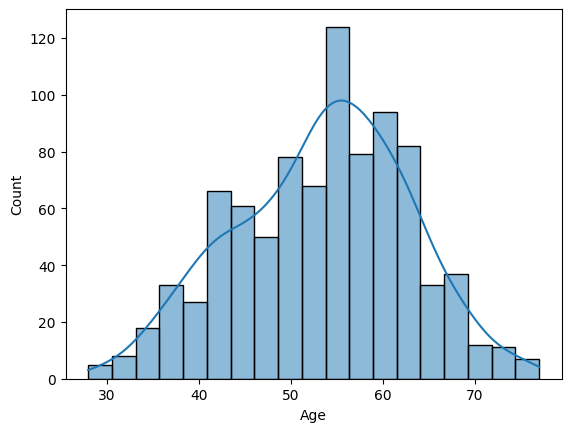

In [20]:
# Age

sns.histplot(data=df,x='Age',kde=True)

In [21]:
# Observations
# Most of the data is in between the age 50 to 60
# It is slightly left skewed

<Axes: xlabel='Sex', ylabel='count'>

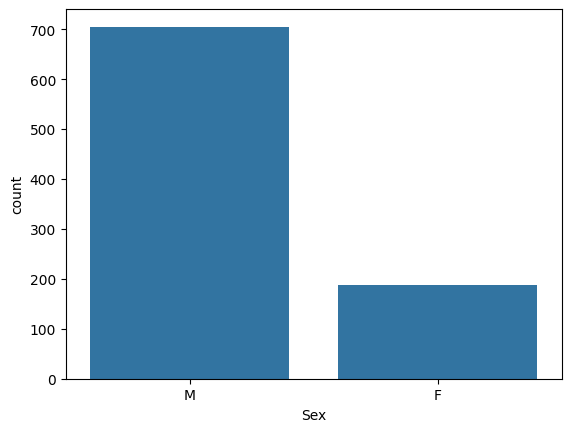

In [22]:
# Sex
sns.countplot(data=df,x='Sex')

In [23]:
# Observations
# Most of the data are from male and female contains a very less data

<Axes: xlabel='ChestPainType', ylabel='count'>

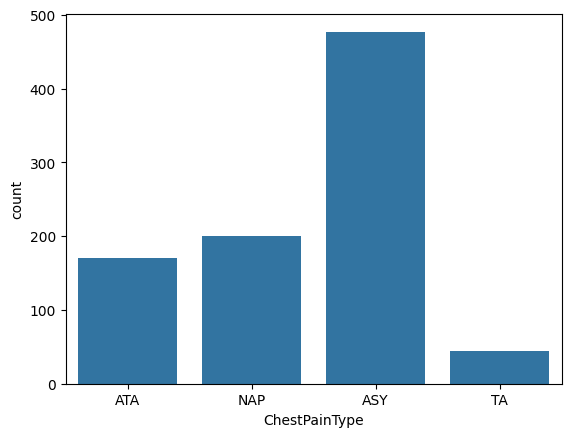

In [24]:
# ChestPain
sns.countplot(data=df,x='ChestPainType')

In [25]:
# Observations
# Most of the data in the dataset are ASY Chestpaintype and next highest is NAP
# The TA chestpaintype has least data in the dataset

<Axes: xlabel='RestingBP', ylabel='Count'>

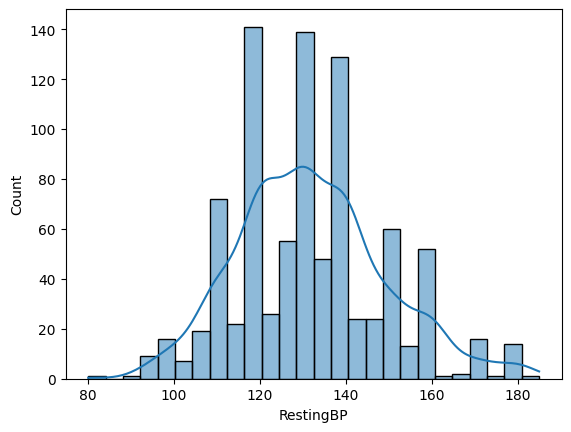

In [26]:
# RestingBP
sns.histplot(data=df,x='RestingBP',kde=True)

In [27]:
# Observations
# Most of the data of RestingBP lies in between 120 to 140

<Axes: xlabel='Cholesterol', ylabel='Count'>

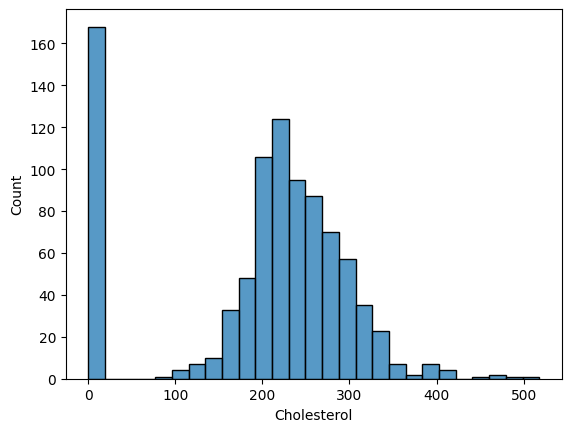

In [28]:
# Cholesterol
sns.histplot(data=df,x='Cholesterol')

In [29]:
# Observations
# Most of the values are in 0
# Next the values lies in between 200 to 300
# There are some outliers in the right

<Axes: xlabel='FastingBS'>

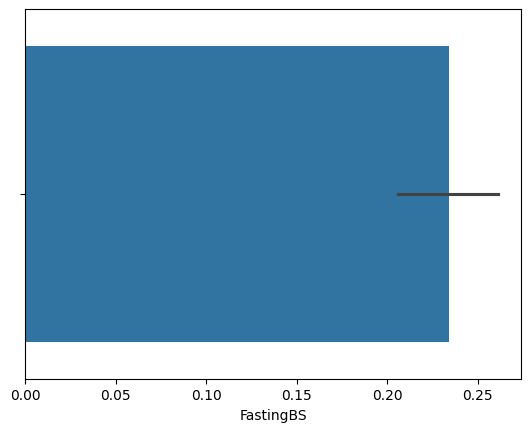

In [30]:
# FastingBS
sns.barplot(data=df,x='FastingBS')

In [31]:
df['FastingBS'].value_counts()

,count
FastingBS,
0,684
1,209


In [32]:
# Observations
# The value of 0 are 684
# The value of 1 are 209

<Axes: xlabel='RestingECG', ylabel='count'>

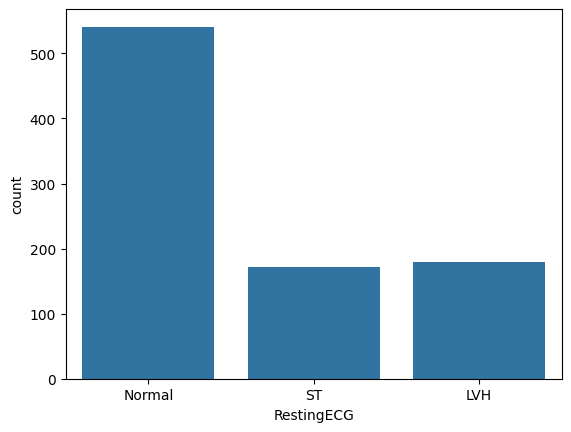

In [33]:
# Resting ECG
sns.countplot(data=df,x='RestingECG')

In [34]:
# Observations
# Most of the data in the dataset says that the people hs normal resting ECG
# The next highest RestingECG is LVH and then ST

<Axes: xlabel='MaxHR', ylabel='Count'>

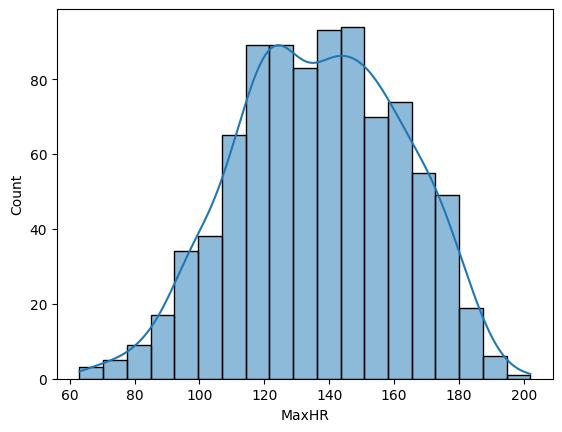

In [35]:
# MaxHR
sns.histplot(data=df,x='MaxHR',kde=True)

In [36]:
# Observations
# Most of the values lie in between 110 to 160
# It is slightly left skewed

<Axes: xlabel='ExerciseAngina', ylabel='count'>

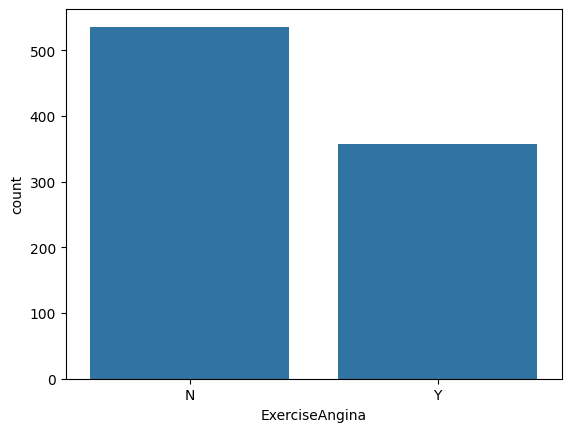

In [37]:
# ExcerciseAngina
sns.countplot(data=df,x='ExerciseAngina')

In [38]:
# Observations
# Most of the data in dataset has N ExerciseAngina
# Then Y has the data points less than N

<Axes: xlabel='Oldpeak', ylabel='Count'>

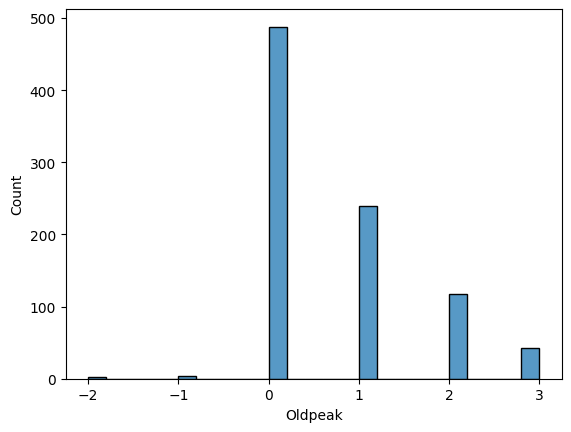

In [39]:
# Oldpeak
sns.histplot(data=df,x='Oldpeak')

In [40]:
# Observations
# Most of the values are in 0 oldpeak
# The data also has values in 1,2,3
# There are also some values in -1,-2

<Axes: xlabel='ST_Slope', ylabel='count'>

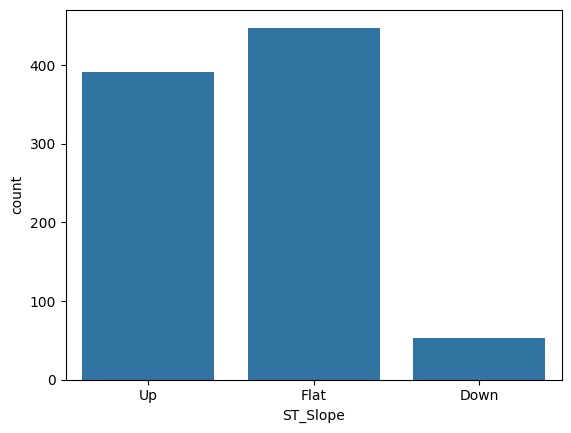

In [41]:
# ST_Slope
sns.countplot(data=df,x='ST_Slope')

In [42]:
# Observations
# Most of the values are in Flat and Up of ST_Slope
# there are some values in Down of ST_Slope

### **7. Bivariate Analysis** — *[20 Marks]*
Analyze the relationship of **each independent variable** with the target variable `HeartDisease`.
- Box plots, violin plots, groupby means
- Separate plots/analysis for each column

---


<Axes: xlabel='HeartDisease', ylabel='Age'>

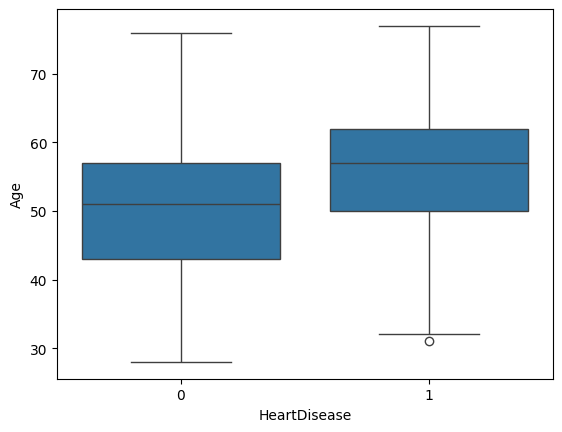

In [43]:
# Age vs HeartDisease
sns.boxplot(data=df,x='HeartDisease',y='Age')

In [44]:
# Observations
# People with heart disease are older than those without it
# Most of the data points with no heart disease lie in between 40 to 60
# Most of the datapoints with heart disease lie in between 50 to 65
# the data with heart disease has one outlier

<Axes: xlabel='Sex', ylabel='count'>

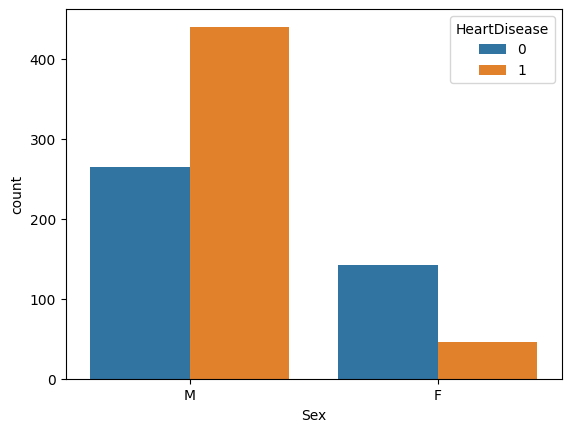

In [45]:
# Sex VS HeartDisease
sns.countplot(data=df,x='Sex',hue='HeartDisease')

In [46]:
# Observations
# In the data most of the people with heart disease are male and female have less heart disease
# Most of the data the females are healthy than males

<Axes: xlabel='ChestPainType', ylabel='count'>

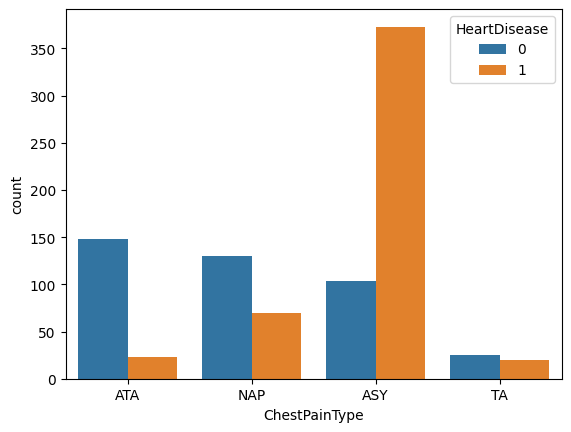

In [47]:
# Chestpain VS HeartDisease
sns.countplot(data=df,x='ChestPainType',hue='HeartDisease')

In [48]:
# Observations
# Most of the data with ASY has heart disease
# There is no direct relationship between Chestpain type and heartdisease

<Axes: xlabel='HeartDisease', ylabel='RestingBP'>

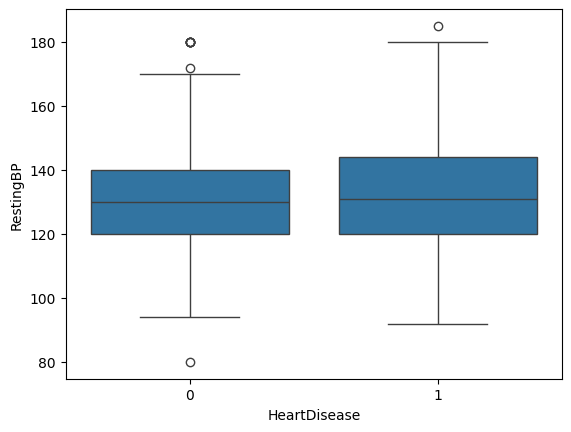

In [49]:
# RestingBP VS HeartDisease
sns.boxplot(data=df,x='HeartDisease',y='RestingBP')

In [50]:
# Observations

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

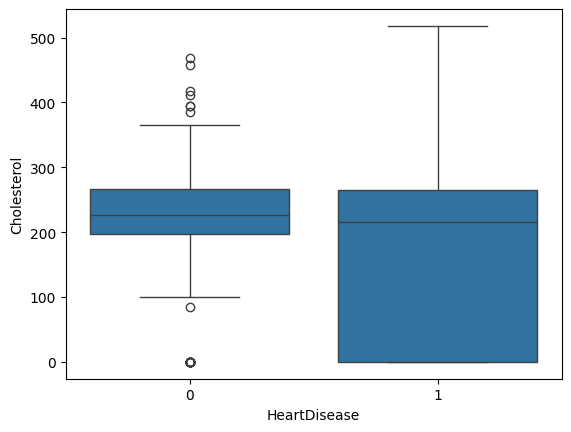

In [51]:
# Cholesterol VS HeartDisease
sns.boxplot(data=df,x='HeartDisease',y='Cholesterol')

In [52]:
# Observations
# Most of the people with cholesterol has higher chances to get heartdisease

<Axes: xlabel='FastingBS', ylabel='count'>

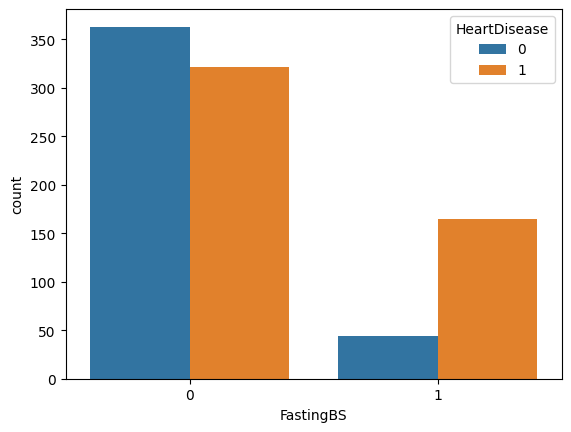

In [53]:
# FastingBS VS HeartDisease
sns.countplot(data=df,x='FastingBS',hue='HeartDisease')

In [54]:
# Observations
# People with fastingBS 0 has higher chances of getting heartdisease

<Axes: xlabel='RestingECG', ylabel='count'>

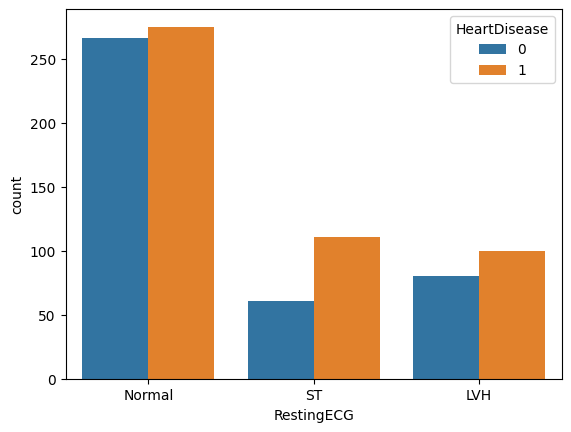

In [55]:
# REstingECG VS HeartDisease
sns.countplot(data=df,x='RestingECG',hue='HeartDisease')

In [56]:
df.groupby('RestingECG')['HeartDisease'].value_counts()

RestingECG  HeartDisease
LVH         1               100
            0                80
Normal      1               275
            0               266
ST          1               111
            0                61
Name: count, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='MaxHR'>

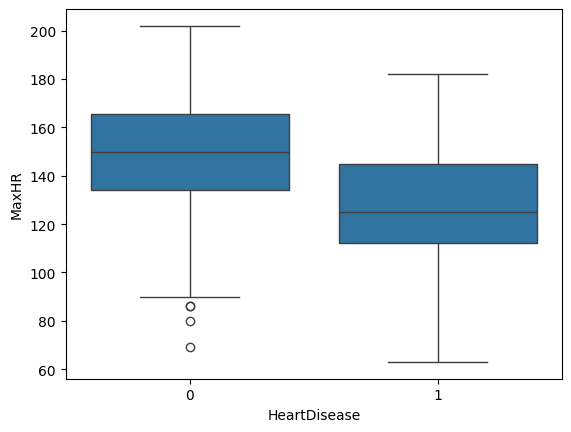

In [57]:
# MaxHR VS HeartDisease
sns.boxplot(data=df,x='HeartDisease',y='MaxHR')

In [58]:
# Observations
# heardisease and maxHR is inversely proportional

<Axes: xlabel='ExerciseAngina', ylabel='count'>

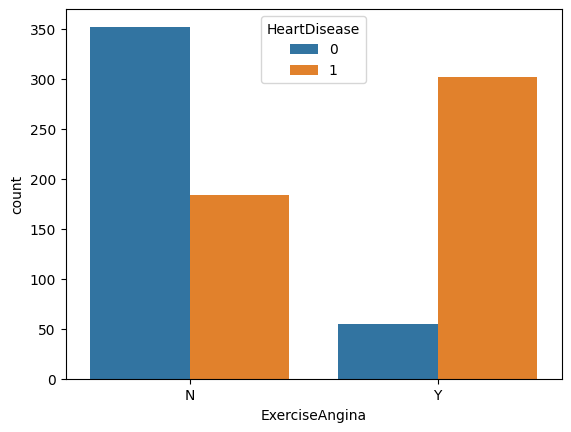

In [59]:
# ExerciseAngina VS HeartDisease
sns.countplot(data=df,x='ExerciseAngina',hue='HeartDisease')

In [60]:
# Observations
# We can say that the people with ExerciseAngina is high that means they are healthy
# if ExerciseAngina is less then we can say that there are more chances of getting heartdisease

<Axes: xlabel='HeartDisease', ylabel='Oldpeak'>

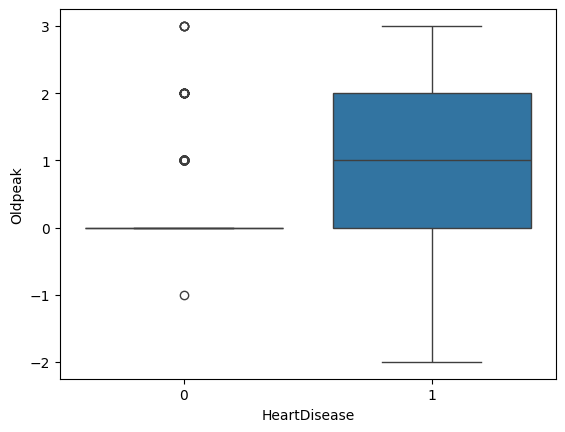

In [61]:
# Oldpeak VS HeartDisease
sns.boxplot(data=df,x='HeartDisease',y='Oldpeak')

In [62]:
# Observations
# most of the people in the data with old peak has heartdisease

<Axes: xlabel='ST_Slope', ylabel='count'>

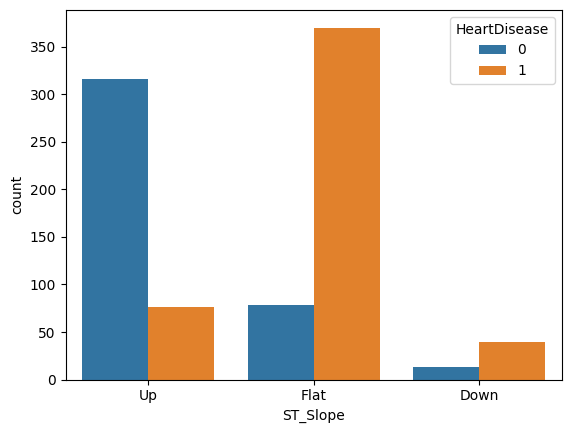

In [63]:
# ST_Slope VS HeartDisease
sns.countplot(data=df,x='ST_Slope',hue='HeartDisease')

In [64]:
# Observations
# we can say that the if ST_slope is flat then there is higher change of getting heartdisease
# if the st slope is down then there is a very les hance of getting heartdisease

### **8. Multivariate Analysis** — *[10 Marks]*
- Pairplot
- Interactions between 2+ variables
- Comments on how combinations impact heart disease

---


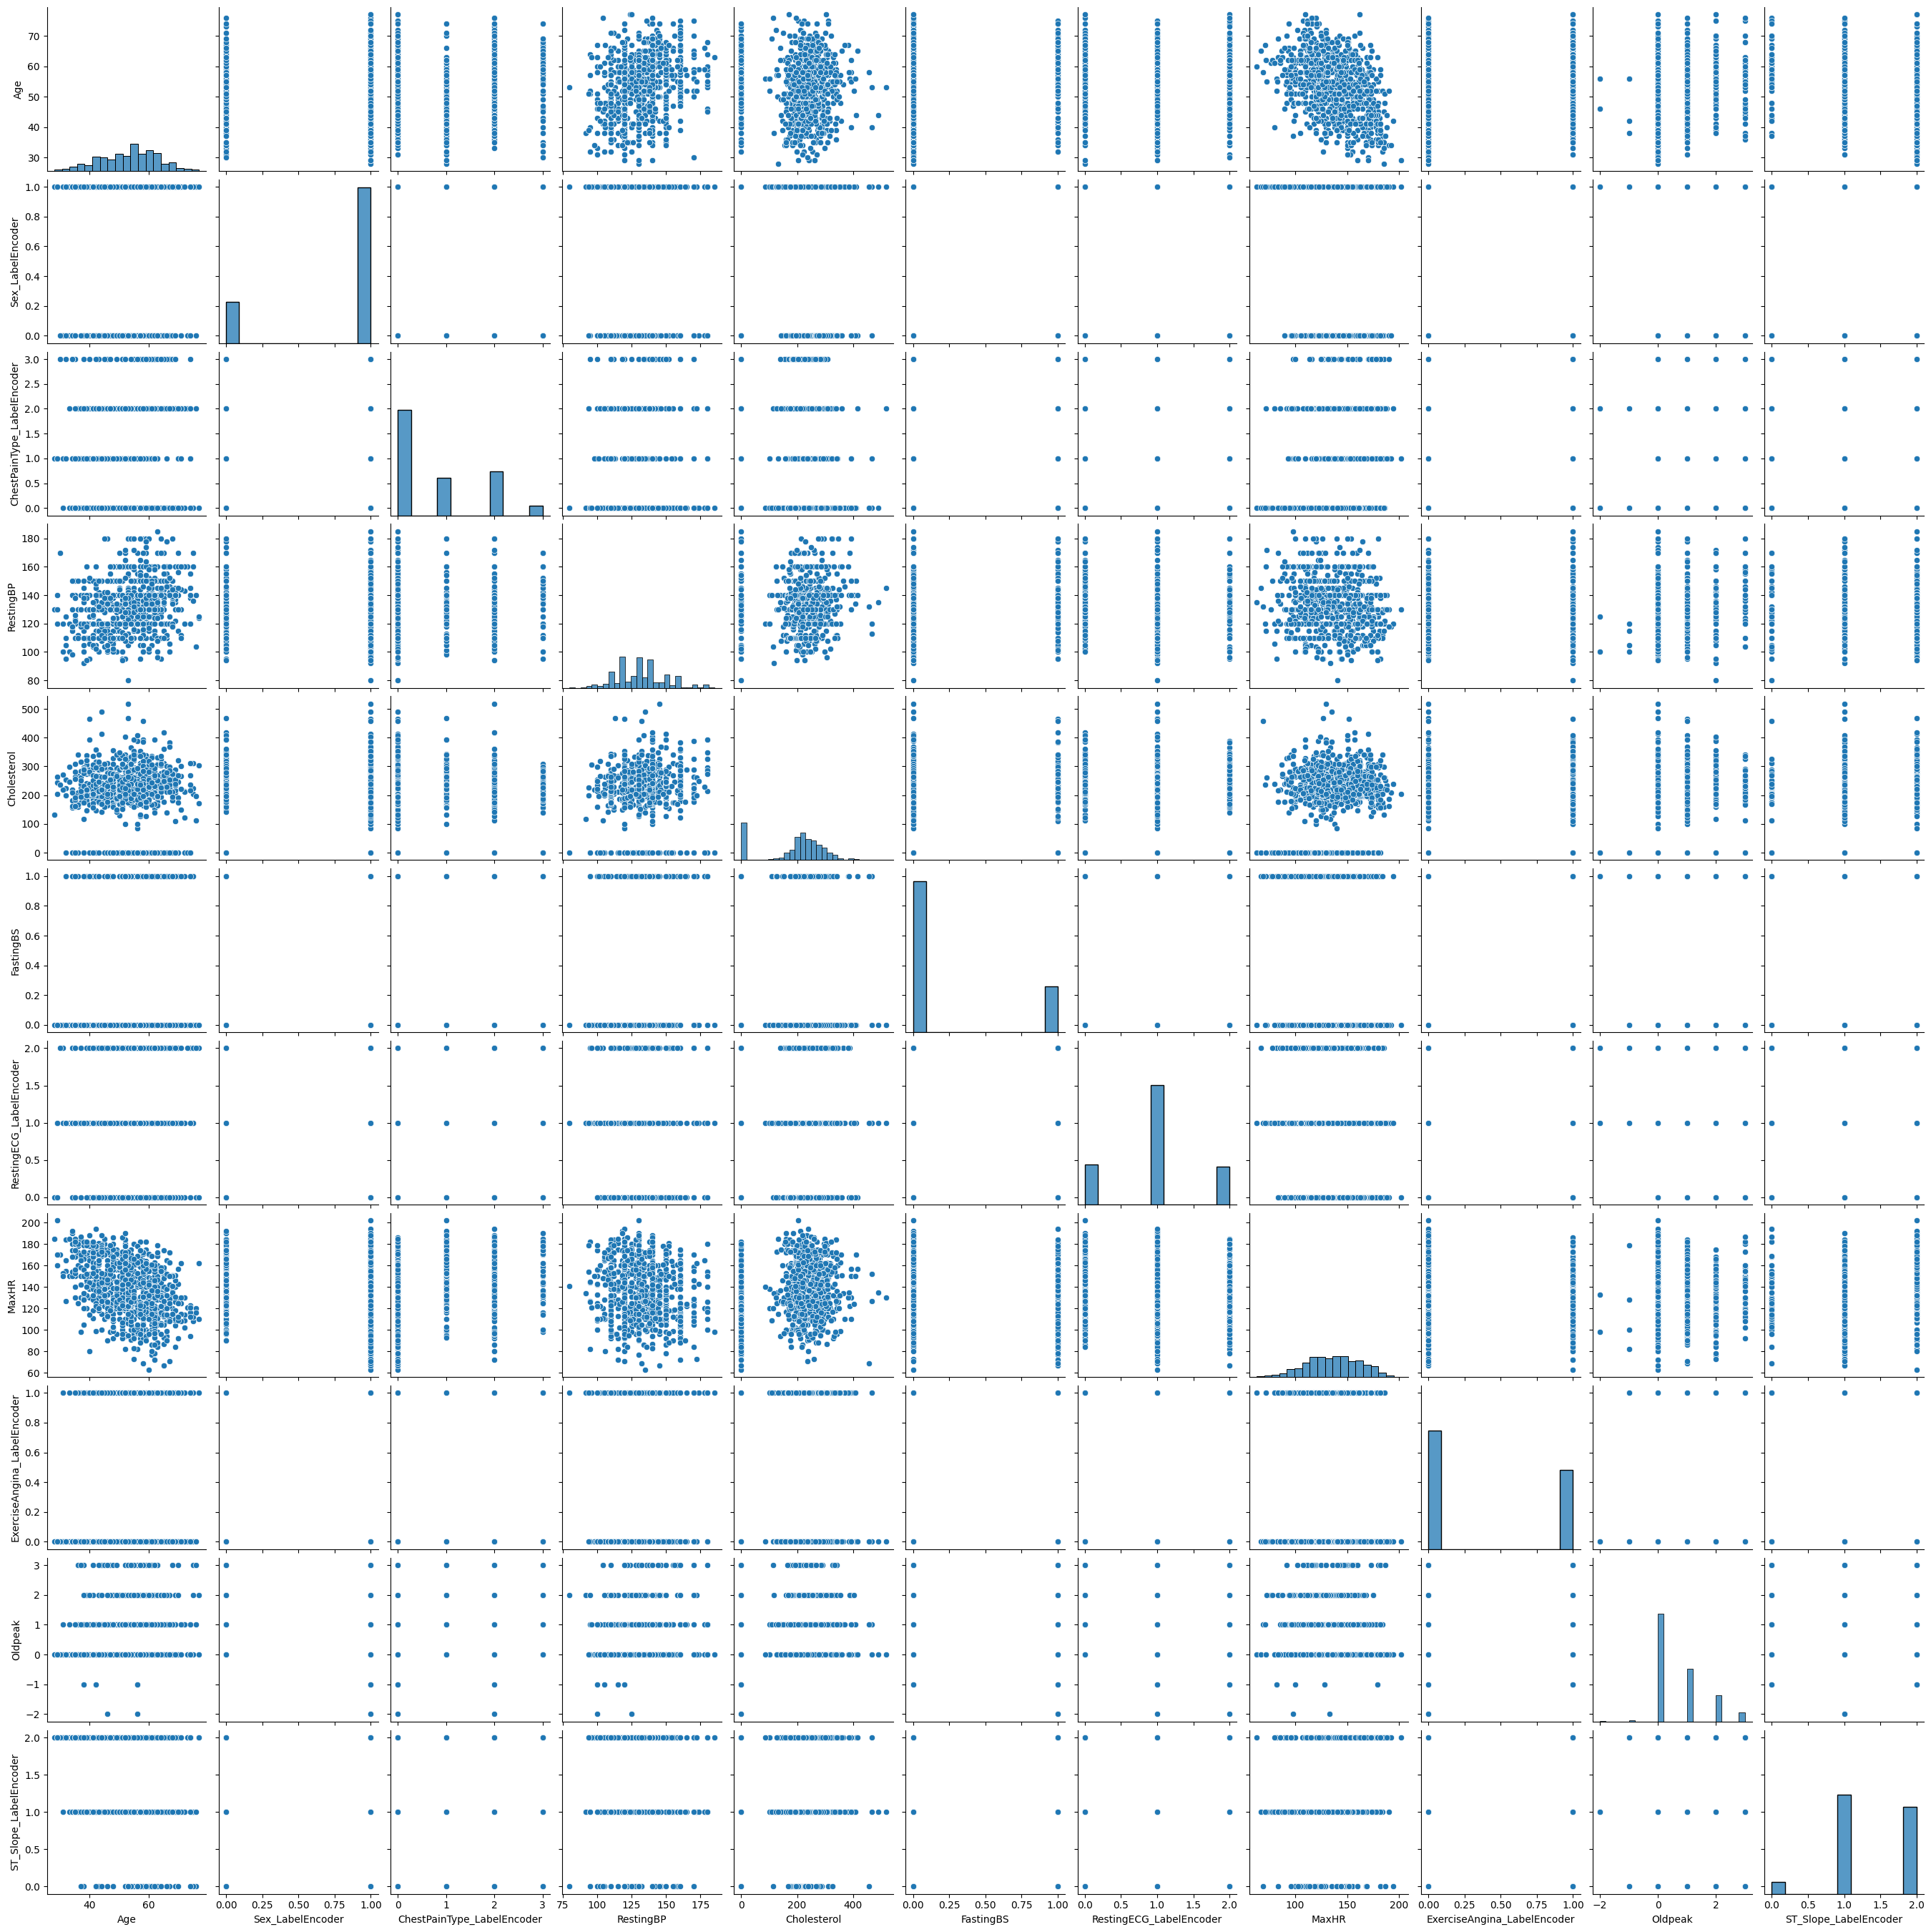

In [65]:
X = df.drop(columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
y = df['HeartDisease']
sns.pairplot(df[['Age','Sex_LabelEncoder','ChestPainType_LabelEncoder','RestingBP','Cholesterol','FastingBS','RestingECG_LabelEncoder','MaxHR','ExerciseAngina_LabelEncoder','Oldpeak','ST_Slope_LabelEncoder']])
plt.show()

### **9. Heatmap - Correlation Matrix** — *[10 Marks]*
- Correlation matrix
- Use `seaborn.heatmap()`
- Identify top correlations with target

---


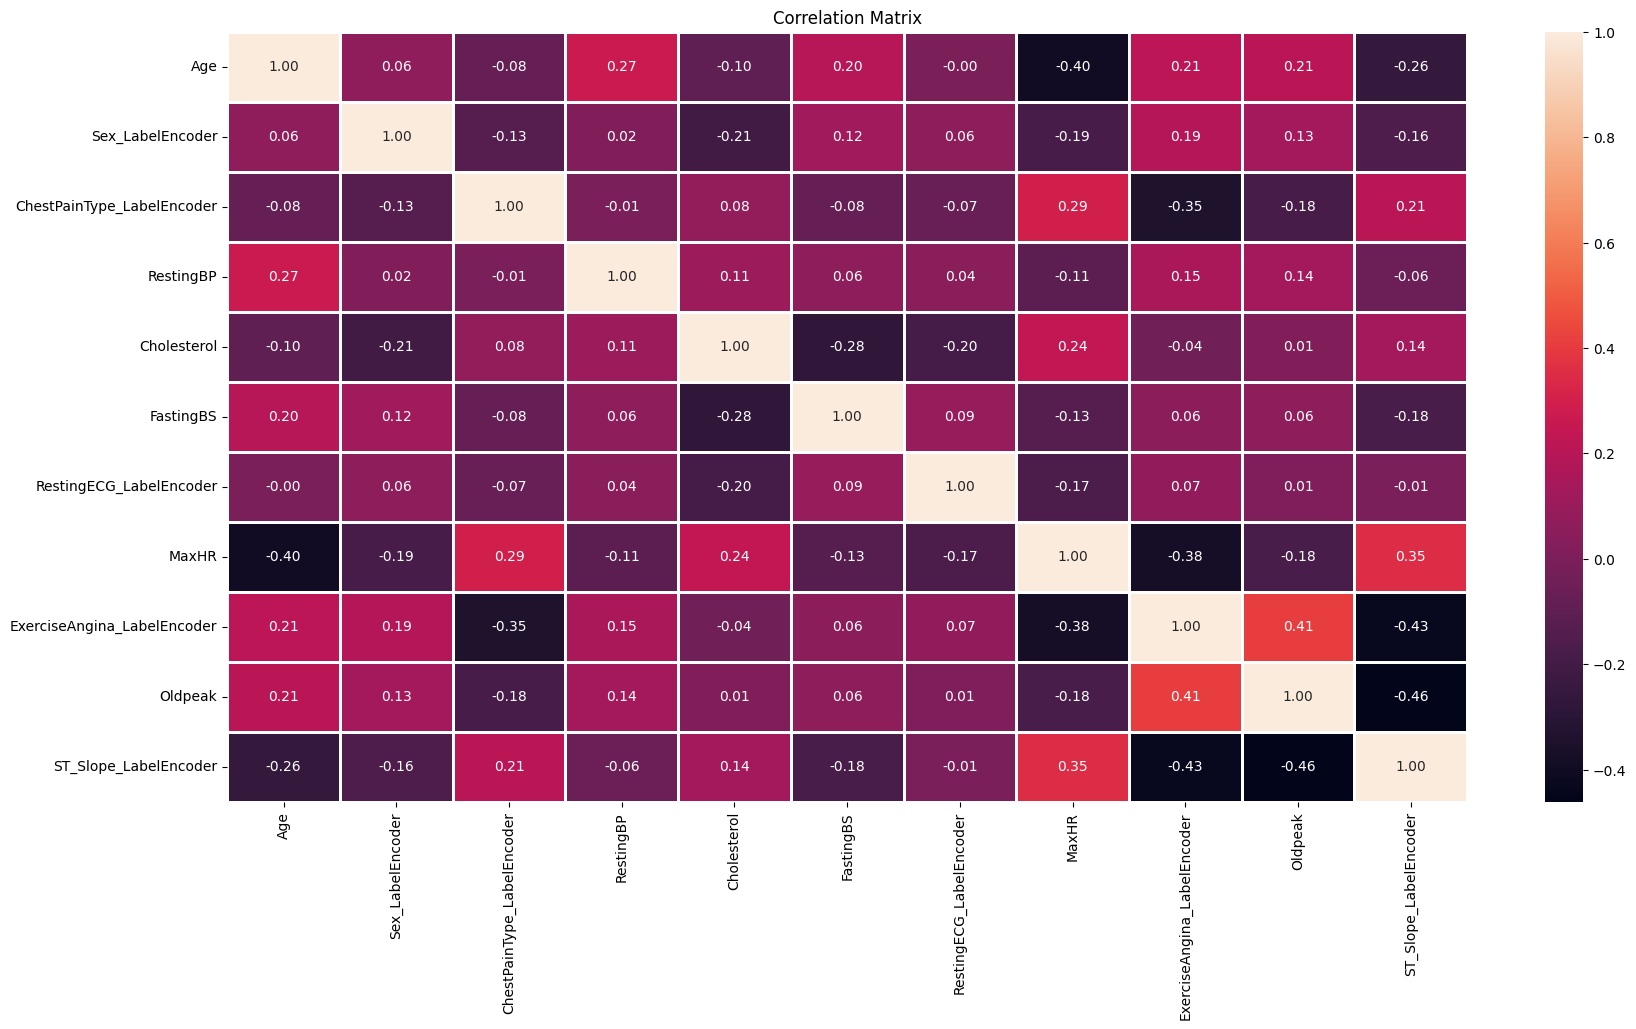

In [66]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[['Age','Sex_LabelEncoder','ChestPainType_LabelEncoder','RestingBP','Cholesterol','FastingBS','RestingECG_LabelEncoder','MaxHR','ExerciseAngina_LabelEncoder','Oldpeak','ST_Slope_LabelEncoder']].corr(), annot=True, linewidths=1, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



### **10. Model Building** — *[50 Marks]*
Build the following classification models:
- Logistic Regression
- Naive Bayes (choose appropriate types)
- K-Nearest Neighbors (KNN)
- Decision Tree
- Support Vector Machine (SVM)
- Random Forest
- Bagging Classifier
- Boosting Algorithms:
  - AdaBoost
  - Gradient Boosting (GBM)
  - XGBoost
- Stacking Ensemble
- Voting Classifier

---



In [67]:
X = df[['Age','Sex_LabelEncoder','ChestPainType_LabelEncoder','RestingBP','Cholesterol','FastingBS','RestingECG_LabelEncoder','MaxHR','ExerciseAngina_LabelEncoder','Oldpeak','ST_Slope_LabelEncoder']]
y = df['HeartDisease']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (714, 11), Test set size: (179, 11)


In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)


# Naive Bayes (Gaussian)
nb_gaussian_model = GaussianNB()
nb_gaussian_model.fit(X_train_scaled, y_train)


# Naive Bayes (Bernoulli)
nb_bernoulli_model = BernoulliNB()
nb_bernoulli_model.fit(X_train_scaled, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)


# Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)


# Bagging Classifier
bagging_model = BaggingClassifier()
bagging_model.fit(X_train_scaled, y_train)

# XGBoost
import xgboost as xgb
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train_scaled, y_train)



# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_scaled, y_train)

# Gradient Boosting
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scaled, y_train)

# voting classifier()
voting_model = VotingClassifier(estimators=[('knn',knn_model), ('svc',svm_model),('rf',rf_model)],
                                    voting='hard')
voting_model.fit(X_train_scaled, y_train)

print("All models trained successfully")


All models trained successfully


**11.Model Evaluation - *[20 Marks]***
- Accuracy,Precision,Recall,F1-Score
-Confusion Matrix
-ROC-AUC Curve (where applicable)

In [71]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Bernoulli)": BernoulliNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
}



# Step 5: Build and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

# Step 6: Create Voting Classifier (stacking ensemble)
voting_clf = VotingClassifier(estimators=[
    ('logreg', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier())
], voting='hard')

# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Predict and calculate accuracy for Voting Classifier
y_pred_voting = voting_clf.predict(X_test_scaled)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")

Logistic Regression Accuracy: 0.8324
Naive Bayes (Gaussian) Accuracy: 0.8380
Naive Bayes (Bernoulli) Accuracy: 0.8324
K-Nearest Neighbors Accuracy: 0.8771
Decision Tree Accuracy: 0.8045
Support Vector Machine Accuracy: 0.8715
Random Forest Accuracy: 0.8659
Bagging Classifier Accuracy: 0.8101
AdaBoost Accuracy: 0.8268
Gradient Boosting Accuracy: 0.8771
XGBoost Accuracy: 0.8212
Voting Classifier Accuracy: 0.8715


Evaluating Logistic Regression:


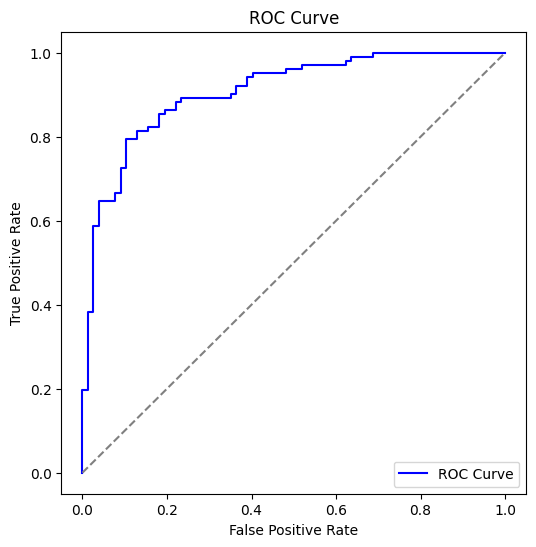

Accuracy: 0.8324
Precision: 0.9000
Recall: 0.7941
F1-Score: 0.8438
Confusion Matrix:
[[68  9]
 [21 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        77
           1       0.90      0.79      0.84       102

    accuracy                           0.83       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.84      0.83      0.83       179

ROC-AUC: 0.906926406926407


Evaluating Naive Bayes (Gaussian):


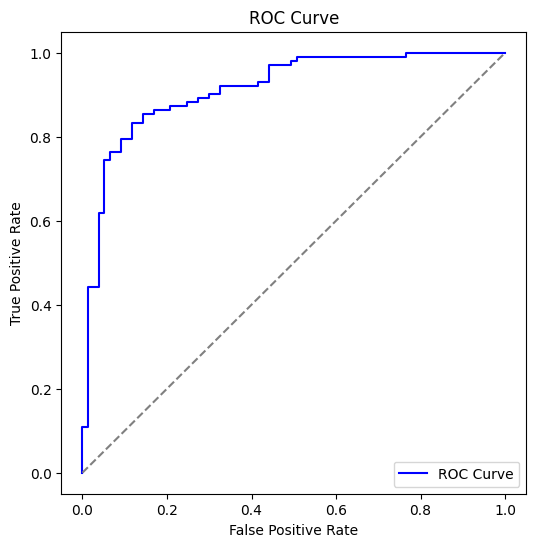

Accuracy: 0.8380
Precision: 0.9101
Recall: 0.7941
F1-Score: 0.8482
Confusion Matrix:
[[69  8]
 [21 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        77
           1       0.91      0.79      0.85       102

    accuracy                           0.84       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.85      0.84      0.84       179

ROC-AUC: 0.9140565317035906


Evaluating Naive Bayes (Bernoulli):


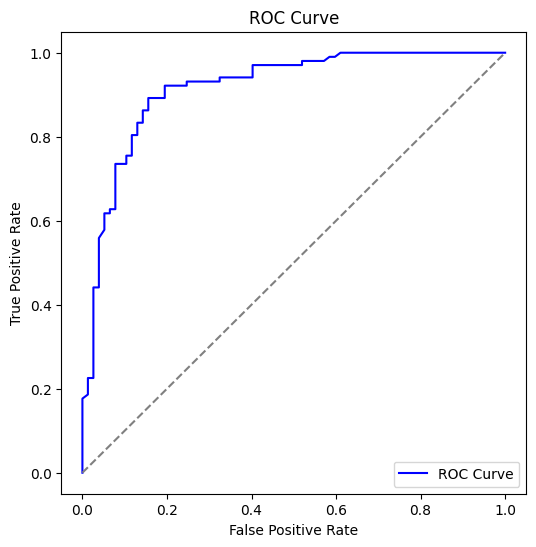

Accuracy: 0.8324
Precision: 0.9000
Recall: 0.7941
F1-Score: 0.8438
Confusion Matrix:
[[68  9]
 [21 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        77
           1       0.90      0.79      0.84       102

    accuracy                           0.83       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.84      0.83      0.83       179

ROC-AUC: 0.9170486376368729


Evaluating K-Nearest Neighbors:


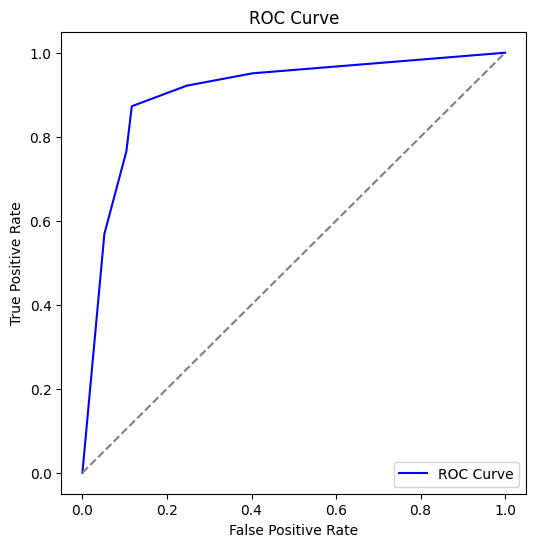

Accuracy: 0.8771
Precision: 0.9082
Recall: 0.8725
F1-Score: 0.8900
Confusion Matrix:
[[68  9]
 [13 89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.87      0.89       102

    accuracy                           0.88       179
   macro avg       0.87      0.88      0.88       179
weighted avg       0.88      0.88      0.88       179

ROC-AUC: 0.9052075375604787


Evaluating Decision Tree:


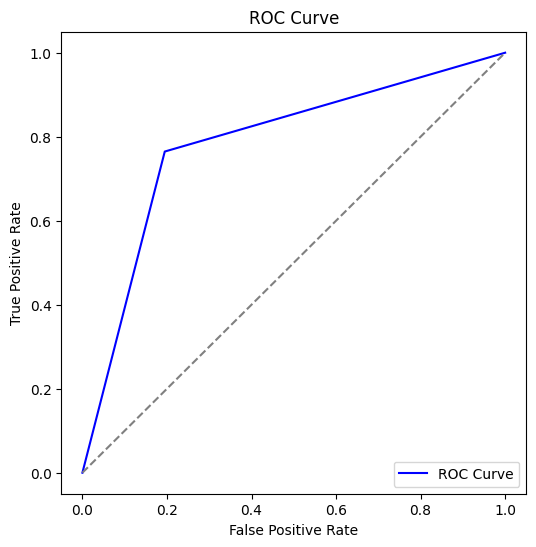

Accuracy: 0.7821
Precision: 0.8387
Recall: 0.7647
F1-Score: 0.8000
Confusion Matrix:
[[62 15]
 [24 78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        77
           1       0.84      0.76      0.80       102

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179

ROC-AUC: 0.7849503437738732


Evaluating Support Vector Machine:


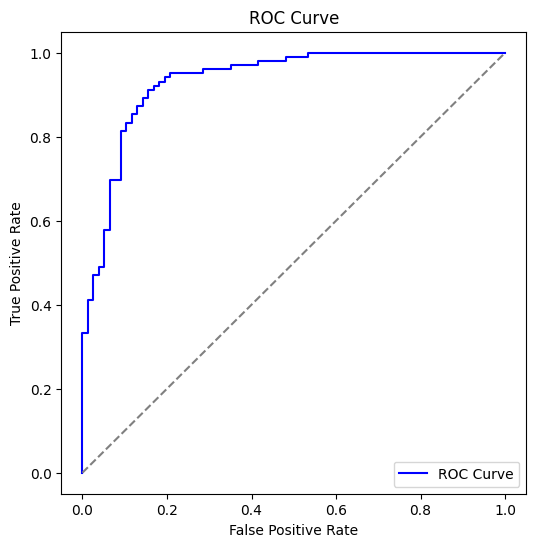

Accuracy: 0.8715
Precision: 0.8835
Recall: 0.8922
F1-Score: 0.8878
Confusion Matrix:
[[65 12]
 [11 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        77
           1       0.88      0.89      0.89       102

    accuracy                           0.87       179
   macro avg       0.87      0.87      0.87       179
weighted avg       0.87      0.87      0.87       179

ROC-AUC: 0.9334097275273746


Evaluating Random Forest:


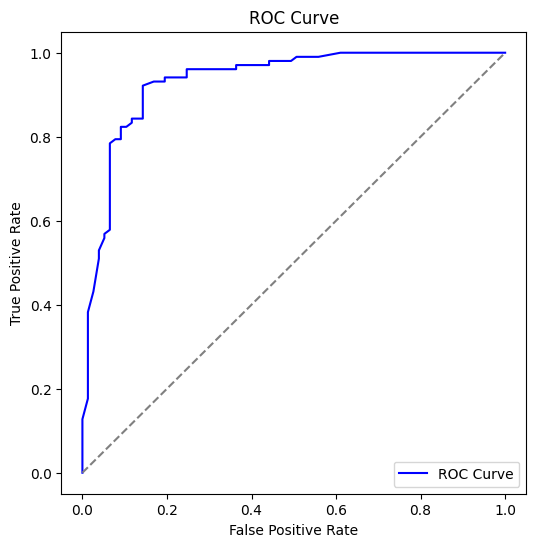

Accuracy: 0.8659
Precision: 0.8900
Recall: 0.8725
F1-Score: 0.8812
Confusion Matrix:
[[66 11]
 [13 89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.89      0.87      0.88       102

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179

ROC-AUC: 0.9333460656990069


Evaluating Bagging Classifier:


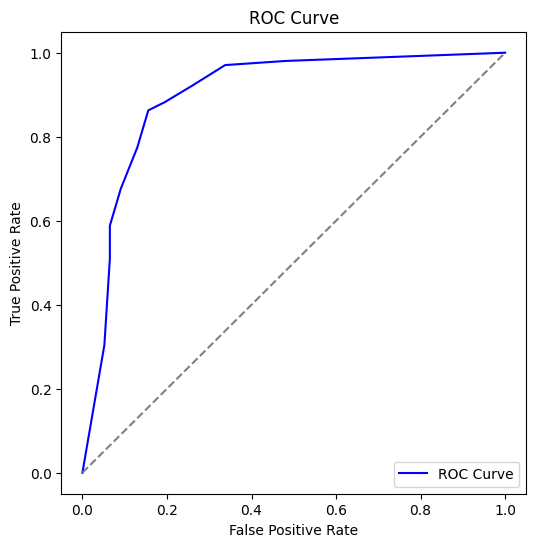

Accuracy: 0.8156
Precision: 0.8876
Recall: 0.7745
F1-Score: 0.8272
Confusion Matrix:
[[67 10]
 [23 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        77
           1       0.89      0.77      0.83       102

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.81       179
weighted avg       0.83      0.82      0.82       179

ROC-AUC: 0.8991596638655462


Evaluating AdaBoost:


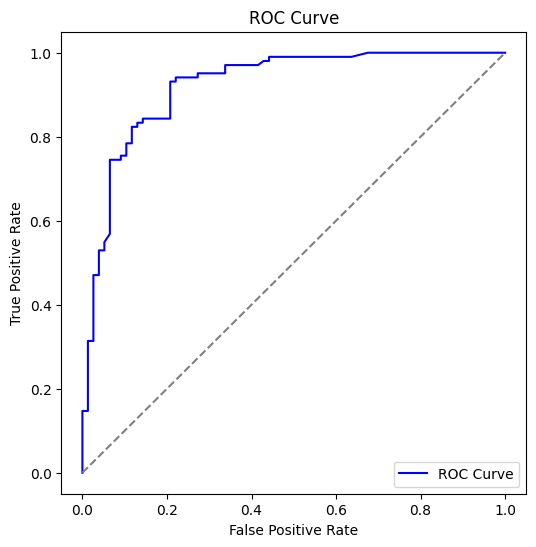

Accuracy: 0.8268
Precision: 0.8515
Recall: 0.8431
F1-Score: 0.8473
Confusion Matrix:
[[62 15]
 [16 86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        77
           1       0.85      0.84      0.85       102

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

ROC-AUC: 0.9219505984211867


Evaluating Gradient Boosting:


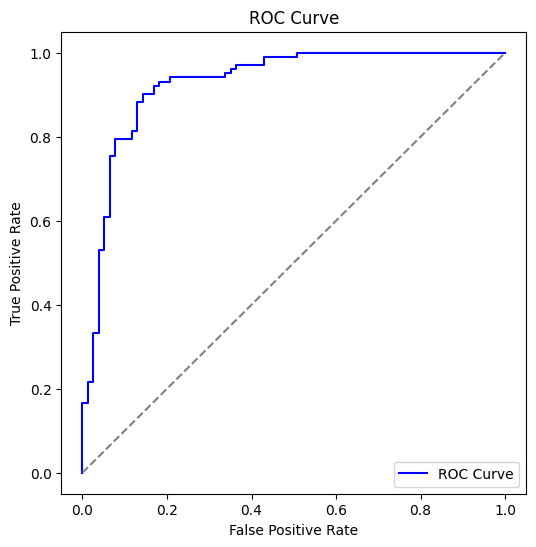

Accuracy: 0.8771
Precision: 0.9000
Recall: 0.8824
F1-Score: 0.8911
Confusion Matrix:
[[67 10]
 [12 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.88      0.89       102

    accuracy                           0.88       179
   macro avg       0.87      0.88      0.88       179
weighted avg       0.88      0.88      0.88       179

ROC-AUC: 0.927170868347339


Evaluating XGBoost:


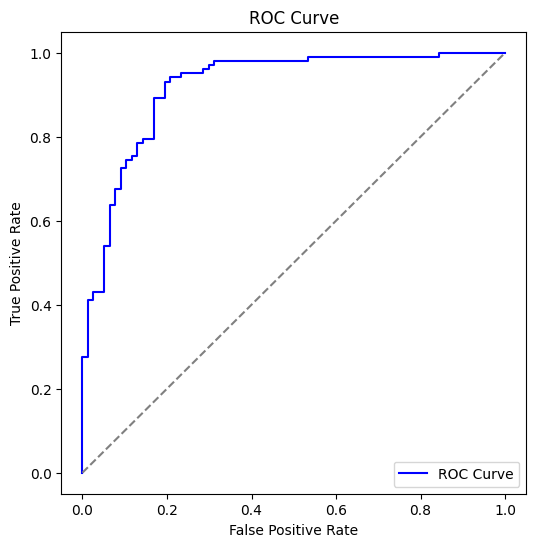

Accuracy: 0.8212
Precision: 0.8646
Recall: 0.8137
F1-Score: 0.8384
Confusion Matrix:
[[64 13]
 [19 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        77
           1       0.86      0.81      0.84       102

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179

ROC-AUC: 0.919022154316272


Evaluating Voting Classifier:
Accuracy: 0.8659
Precision: 0.8900
Recall: 0.8725
F1-Score: 0.8812
Confusion Matrix:
[[66 11]
 [13 89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.89      0.87      0.88       102

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179

ROC-AUC: N/A




In [72]:
def evaluate_model(model, X_test, y_test):
    # Predict the target values
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, and f1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification report
    clf_report = classification_report(y_test, y_pred)

    # ROC-AUC
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, color='blue', label='ROC Curve')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()
    else:
        roc_auc = 'N/A'

    return accuracy, precision, recall, f1, cm, clf_report, roc_auc
models = {
    'Logistic Regression': logistic_model,
    'Naive Bayes (Gaussian)': nb_gaussian_model,
    'Naive Bayes (Bernoulli)': nb_bernoulli_model,
    'K-Nearest Neighbors': knn_model,
    'Decision Tree': dt_model,
    'Support Vector Machine': svm_model,
    'Random Forest': rf_model,
    'Bagging Classifier': bagging_model,
    'AdaBoost': adaboost_model,
    'Gradient Boosting': gbm_model,
    'XGBoost': xgboost_model,
    'Voting Classifier': voting_model
}


for name, model in models.items():
    print(f"Evaluating {name}:")
    accuracy, precision, recall, f1, cm, clf_report, roc_auc = evaluate_model(model, X_test_scaled, y_test)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{clf_report}")
    print(f"ROC-AUC: {roc_auc}")
    print("\n" + "="*50 + "\n")

**Logistic regression **
- Accuracy: 0.8324
- Precision: 0.9000
- Recall: 0.7941
- F1-Score: 0.8438

Naive Bayes (Gaussian)
- Accuracy: 0.8380
- Precision: 0.9101
- Recall: 0.7941
- F1-Score: 0.8482


Naive Bayes (Bernoulli)
- Accuracy: 0.8324
- Precision: 0.9000
- Recall: 0.7941
- F1-Score: 0.8438

K-Nearest Neighbors (KNN)
- Accuracy: 0.8771
- Precision: 0.9082
- Recall: 0.8725
- F1-Score: 0.8900

Decision Tree
- Accuracy: 0.7989
- Precision: 0.8438
- Recall: 0.7941
- F1-Score: 0.8182

Support Vector Machine (SVM)
- Accuracy: 0.8715
- Precision: 0.8835
- Recall: 0.8922
- F1-Score: 0.8878

Bagging Classifier
- Accuracy: 0.8324
- Precision: 0.8830
- Recall: 0.8137
- F1-Score: 0.8469

Random forest:
- Accuracy: 0.8771
- Precision: 0.9082
- Recall: 0.8725
- F1-Score: 0.8900

AdaBoost
- Accuracy: 87.32%
- Precision: 0.8515
- Recall: 0.8431
- F1-Score: 0.8473

Gradient Boosting:
- Accuracy: 0.8771
- Precision: 0.9000
- Recall: 0.8824
- Score: 0.8911


XGBoost:
-Accuracy: 0.8212
- Precision: 0.8646
- Recall: 0.8137
- F1-Score: 0.8384


Voting Classifier:
-Accuracy: 0.8883
- Precision: 0.9020
- Recall: 0.9020
- F1-Score: 0.9020

### **12. Interpretation of Metrics** — *[10 Marks]*
- Explain what the evaluation metrics mean
- Discuss trade-offs (e.g., precision vs recall)

---


ACCURACY : IT shows the percentage of predictions the model got right. Votting classifier has the highest accuracy

PRECISION : It tells us out of all the positive predictions the model made how many were actually correct .Naive bayes guassian has the highest precision

RECALL : High recall means the model missed few positive cases.Votting classifier has the highest recall

F1 score: It is a balance between both precision and recall

ROC-AUC : It measures how well the model can separate the two cases .Score closer to 1 means better performance


- If we care more about not missing positive cases we care more about recall

- If we care more about avoiding false negatives we care more about precision


### **13. Final Conclusion** — *[10 Marks]*
- Summarize findings
- Which model performed best?
- Possible improvements

---

 **Total: 200 Marks**


- After building all the model votting classifier performed well with high accuracy

- Collecting more data or using better features for training will help to improve the model performance
